<a href="https://colab.research.google.com/github/sio-co2o2/scrippsco2_notebooks/blob/main/notebooks/plot_mlo_spo_icecore_back_2K_scrippsco2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sio-co2o2/scrippsco2_notebooks/main?labpath=notebooks%2Fplot_mlo_spo_icecore_back_2K_scrippsco2.ipynb)

# Plot  CO2 of Mauna Loa and South Pole average plus Icecore Record back 2K

### Scripps CO2 Program
https://scrippsco2.ucsd.edu

This notebook creates pdf and png plot versions.

## Update directories and logo before running

In [1]:
import re
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import pathlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import ticker
import os
from PIL import Image

%matplotlib inline

In [2]:
# This package is used to convert a vector svg into a png

try:
  from cairosvg import svg2png
except:
  ! pip install cairosvg
  from cairosvg import svg2png

In [3]:
# This import is to enable Google Colab to save files ane then download them

# This import does not exist unless the notebook is run in Google Colab
# Put in a try except block if user wants to use notebook off of Google Colab

try:
    from google.colab import files
except:
    pass

## Set directories and file names for data,  plot, and logo

In [4]:
# Data from scrippsco2.ucsd.edu
mlo_spo_average_icecore_dir = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/merged_ice_core_mlo_spo'

averaged_data_dir = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/mlo_spo_average'

# Data from bluemoon
# mlo_spo_average_icecore_dir = 'data/to_post/merged_ice_core_mlo_spo'
# averaged_data_dir = 'data/to_post/mlo_spo_average'

merged_file = 'merged_ice_core_yearly.csv'
merged_url = f"{mlo_spo_average_icecore_dir}/{merged_file}" 

merged_spline_file = 'spline_merged_ice_core_yearly.csv'
merged_spline_url = f"{mlo_spo_average_icecore_dir}/{merged_spline_file}"

mlo_spo_averaged_file = f"{averaged_data_dir}/mlo_spo_annual_mean.csv"

# TODO
# Get icecore data from its site
# from bluemoon
# icecore_file = 'data/supplemental/icecore/icecore_before_1958/icecore_back_2K_to_1958_span.csv'

# from github
icecore_file = 'https://raw.githubusercontent.com/sio-co2o2/scrippsco2_notebooks/main/data/icecore/icecore_back_2K_to_1958_span.csv'

# Set plot directories for website graphics gallery
plot_dir = pathlib.Path('./plots')
plot_dir.mkdir(exist_ok=True)

plot_pdf_dir = pathlib.Path(plot_dir / 'pdf')
plot_pdf_dir.mkdir(exist_ok=True)

plot_png_dir = pathlib.Path(plot_dir / 'png')
plot_png_dir.mkdir(exist_ok=True)

plot_display_dir = pathlib.Path(plot_dir / 'display')
plot_display_dir.mkdir(exist_ok=True)

plot_thumbnail_dir = pathlib.Path(plot_dir / 'thumbnails')
plot_thumbnail_dir.mkdir(exist_ok=True)

# logo_file = 'images/ucsd_sio_logo.svg'

logo_file = 'https://github.com/sio-co2o2/keelingcurve_notebooks/raw/main/images/logos/ucsd_sio_logo.svg'

plot_name = 'merged_ice_core_record_back_2k'

pdf_file = plot_pdf_dir / f'{plot_name}.pdf'
png_file = plot_png_dir / f'{plot_name}.png'
png_display_file = plot_display_dir / f'{plot_name}.png'
png_thumbnail_file = plot_thumbnail_dir / f'{plot_name}.png'


## Load in Data and process

### Look at the file comments to see what the columns represent for the merged data
The file is icecore data merged with the MLO and SPO average

In [5]:
# Load from URL
response = requests.get(merged_url)
file_text = response.text
text_lines = file_text.split('\n')

# Load from a file
# with open(merged_url) as f:
#     text_lines = f.readlines()

# Currently, the column header is commented out.
# So for now, read in the comments and the file header will be the last two lines.
comments = [line for line in text_lines if line.startswith('"')]
print('\n'.join(comments))

"-------------------------------------------------------------------------------------------"
"  Atmospheric CO2 record based on ice-core data before 1959 and yearly averages            "
"  of direct observations from Mauna Loa and the South Pole after and                       "
"  including 1959 (from Scripps CO2 Program).                                               "
"                                                                                           "
"  Ice core data from ncdc.noaa.gov/paleo-search/study/995 and                              "
"  yearly averages of direct observations from Mauna Loa and the South Pole after and       "
"  including 1959 from Scripps CO2 Program scrippsco2.ucsd.edu.                             "
"                                                                                           "
"  Cite the ice-core data as                                                                "
"  MacFarling Meure, C., D. Etheridge, C. Trudinger, P. Stee

### Load in merged data

In [6]:
# File is in windows encoding due to degree symbol
df = pd.read_csv(merged_url, encoding='cp1252', comment='"', header=None, names=['date', 'co2'])
df.head()

,date,co2
0,13.3,276.75
1,29.5,277.88
2,56.0,277.38
3,104.5,277.51
4,136.0,278.13


### Convert to numpy array for plotting

In [7]:
date_merged = df['date'].to_numpy()
co2_merged = df['co2'].to_numpy()

### Look at file comments to find what the columns represent for the merged spline data

In [8]:
# Load from URL
response = requests.get(merged_spline_url)
file_text = response.text
text_lines = file_text.split('\n')

# Load from a file
# with open(merged_spline_url) as f:
#     text_lines = f.readlines()

# Currently, the column header is commented out.
# So for now, read in the comments and the file header will be the last two lines.
comments = [line for line in text_lines if line.startswith('"')]
print('\n'.join(comments))

"-------------------------------------------------------------------------------------------"
"  Spline of the atmospheric CO2 record based on ice core data before 1959 and              "
"  yearly averages of direct observations from Mauna Loa and the South Pole after and       "
"  including 1959 (from Scripps CO2 Program).                                               "
"                                                                                           "
"  Ice core data from ncdc.noaa.gov/paleo-search/study/995 and                              "
"  yearly averages of direct observations from Mauna Loa and the South Pole after and       "
"  including 1959 from Scripps CO2 Program scrippsco2.ucsd.edu.                             "
"                                                                                           "
"  Cite the ice-core data as                                                                "
"  MacFarling Meure, C., D. Etheridge, C. Trudinger, P. Stee

### Load in merged spline data

In [9]:
# File is in windows encoding due to degree symbol
df = pd.read_csv(merged_spline_url, encoding='cp1252', comment='"',
                 header=None, names=['date', 'co2'])
df.head()


,date,co2
0,13.3,276.8006
1,13.8,276.8388
2,14.3,276.8771
3,14.8,276.9152
4,15.3,276.9533


### Convert to numpy array for plotting

In [10]:
date_merged_spline = df['date'].to_numpy()
co2_merged_spline = df['co2'].to_numpy()

### Load in icecore data

In [11]:
df_icecore = pd.read_csv(icecore_file, skipinitialspace=True)
df_icecore.head()

,year,co2
0,13.30,276.75
1,29.52,277.88
2,55.96,277.38
3,104.48,277.51
4,135.98,278.13


### Convert to numpy arrays for plotting

In [12]:
date_icecore = df_icecore['year'].to_numpy()
co2_icecore = df_icecore['co2'].to_numpy()

### Load in MLO and SPO averaged data

In [13]:
df_mlo_spo = pd.read_csv(mlo_spo_averaged_file, skipinitialspace=True,sep=',',comment='%', header=None)
df_mlo_spo.columns = ['year', 'co2']

### Remove rows with fill values -99.99 or NaN

In [14]:
df_mlo_spo = df_mlo_spo[df_mlo_spo['co2'] != -99.99]
df_mlo_spo = df_mlo_spo.dropna()

### Convert to numpy arrays for plotting

In [15]:
date_mlo_spo = df_mlo_spo['year'].to_numpy()
co2_mlo_spo = df_mlo_spo['co2'].to_numpy()

## Define Plot Functions

In [16]:
def set_matplotlib_properties():
    
    # Set default properties for matplotlib
    
    # Reset rcparams in case modified defaults in another notebook during same session 
    plt.rcParams.update(plt.rcParamsDefault)

    plt.rcParams.update({'axes.linewidth':1.5})
    
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "sans-serif",
        "font.weight":  "normal",
        "font.sans-serif": ["Arial", "Tahoma", "Helvetica","FreeSans", "NimbusSans", "LiberationSans","DejaVu Sans"],
        "mathtext.default":'regular',
        "mathtext.fontset": "dejavusans"
    })
        
    # http://phyletica.org/matplotlib-fonts/
    # This causes matplotlib to use Type 42 (a.k.a. TrueType) fonts 
    # for PostScript and PDF files. This allows you to avoid Type 3 fonts.
    # Turning on usetex also works
    # Needed on Ubuntu for pdf fonts 
    plt.rcParams.update({
      'pdf.fonttype': 42,
        'ps.fonttype': 42 
    })

In [17]:
def set_website_plot_props(ax, fig, xmin, xmax, ymin, ymax, xlabel, ylabel):


    # ------------------------------------
    # Set properties to use for matplotlib
    # ------------------------------------
    
    set_matplotlib_properties()


    # ---------------------------------
    # Plot properties for website plots
    # ---------------------------------
    
    # Allow room at top for the titles
    fig.subplots_adjust(top=0.85)

    ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=16)

    ax.tick_params(axis='x', which='major', direction='in', length=8, width=1)
    ax.tick_params(axis='y', which='major', direction='in', length=8, width=1)

    tick_spacing = 100
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    tick_spacing = 10
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    # Display every other y major tick label
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    # Display every other x major tick label
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels: label.set_fontweight('bold')

    tick_length = 5
    ax.tick_params(axis='x', which='minor', direction='in', length=tick_length)
       
    tick_length = 4
    ax.tick_params(axis='y', which='minor', direction='in', length=tick_length)
        
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
     
    ax.set_xlabel(xlabel, fontweight='bold', fontsize=21, labelpad=5)
    ax.set_ylabel(ylabel, fontweight='bold', fontsize=21, labelpad=8)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)

    # ax.tick_params(axis='x', labelsize=14)
    # ax.tick_params(axis='y', labelsize=16)

    # ax.tick_params(axis='x', which='major', direction='in', length=8, width=1)
    # ax.tick_params(axis='y', which='major', direction='in', length=8, width=1)

    # tick_spacing = 100
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    # tick_spacing = 50
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    # labels = ax.get_xticklabels() + ax.get_yticklabels()
    # for label in labels: label.set_fontweight('bold')

    # tick_length = 5
    # ax.tick_params(axis='x', which='minor', direction='in', length=tick_length)
          
    # ax.xaxis.set_minor_locator(AutoMinorLocator(2))
     
    # ax.set_xlabel(xlabel, fontweight='bold', fontsize=21, labelpad=5)
    # ax.set_ylabel(ylabel, fontweight='bold', fontsize=21, labelpad=8)
    
    # ax.set_xlim(xmin, xmax)
    # ax.set_ylim(ymin, ymax)

In [18]:
def add_plot_title(ax, title1, title2):

    ax.annotate(title1, xy=(0,1.1), xycoords='axes fraction', fontsize=21,
                    horizontalalignment='left', verticalalignment='top', fontweight="bold")
    ax.annotate(title2, xy=(0,1.04), xycoords='axes fraction', fontsize=12,
                    horizontalalignment='left', verticalalignment='top', fontweight="normal")

In [19]:
def add_sio_logo(fig, logo_file, xpos, ypos):

    # Convert the logo svg file to a png file with the
    # given scale and dpi

    logo_png = 'logo.png'

    #logo_path = str(logo_file.resolve())
    #svg2png(url=logo_path, write_to=logo_png, scale=10, dpi=300)
    svg2png(url=logo_file, write_to=logo_png, scale=10, dpi=300)

    logo = mpimg.imread(logo_png)

    fig.add_axes([xpos, ypos, 0.2, 0.2], anchor='SE', zorder=1)

    plt.imshow(logo)
    plt.axis('off')

    # Delete the logo png version
    os.remove(logo_png)


In [20]:
def save_plot_for_website(fig):

    fig_width, fig_height = fig.get_size_inches()

    # For pdf
    width_in = 11
    #height_in = 8.5
    height_in = (fig_height/fig_width) * width_in

    fig.set_size_inches(width_in, height_in)

    plt.subplots_adjust(left=0.109, right=0.95, top=0.85, bottom=0.15)

    # Save to a high dpi so that logo png file has a high resolution
    fig.savefig(pdf_file, facecolor='w', edgecolor='w',
                orientation='landscape', format=None,
                transparent=False, bbox_inches='tight', dpi=600)

    # Save png version
    png_dpi = 600

    fig.savefig(png_file, facecolor='w', edgecolor='w',
                orientation='landscape', dpi=png_dpi, bbox_inches='tight')

    # For display png
    # width = 1200px

    # Now resize the image
    img = Image.open(png_file)
    img_width, img_height = img.size

    width_px = 1200
    img_scale = (width_px / img_width)
    height_px = int((float(img_height) * float(img_scale)))

    img = img.resize((width_px, height_px), Image.LANCZOS)
    img.save(png_display_file)

    # For thumbail png
    # width = 250px

    # Now resize the image
    img = Image.open(png_file)
    img_width, img_height = img.size

    width_px = 250
    img_scale = (width_px / img_width)
    height_px = int((float(img_height) * float(img_scale)))

    img = img.resize((width_px, height_px), Image.LANCZOS)
    img.save(png_thumbnail_file)


## Set plot limits and labeling

### Functions to convert dates into various formats
For plot limits and labeling

In [21]:
# Function to convert datetime to a float
def dt2t(adatetime):
    """
    Convert adatetime into a float. The integer part of the float should
    represent the year.
    Order should be preserved. If adate<bdate, then d2t(adate)<d2t(bdate)
    time distances should be preserved: If bdate-adate=ddate-cdate then
    dt2t(bdate)-dt2t(adate) = dt2t(ddate)-dt2t(cdate)
    """
    year = adatetime.year
    boy = datetime(year, 1, 1)
    eoy = datetime(year + 1, 1, 1)
    return year + ((adatetime - boy).total_seconds() / ((eoy - boy).total_seconds()))

In [22]:
def get_todays_date_variations():
    
    now = datetime.now()
    todays_decimal =  dt2t(now)
    
    today = date.today()

    todays_day = today.day
    todays_month = today.strftime("%B")
    todays_year = today.year
    todays_date_moyr = today.strftime("%B %Y")
    todays_date_modyyr = f"{todays_month} {todays_day}, {todays_year}"

    return todays_date_moyr, todays_date_modyyr, todays_decimal, todays_year

In [23]:
#  https://stackoverflow.com/questions/19305991/convert-fractional-years-to-a-real-date-in-python
def t2dt(atime):
    """
    Convert atime (a float) to DT.datetime
    This is the inverse of dt2t.
    assert dt2t(t2dt(atime)) == atime
    """
    year = int(atime)
    remainder = atime - year
    boy = datetime(year, 1, 1)
    eoy = datetime(year + 1, 1, 1)
    seconds = remainder * (eoy - boy).total_seconds()
    return boy + timedelta(seconds=seconds)

### Get Todays date for title

In [24]:
# ------------------------------------------------
# Get todays date in various formats for labeling
# ------------------------------------------------
todays_date_moyr, todays_date_modyyr, todays_decimal, todays_year = get_todays_date_variations()

### Set titles and axes labels

In [25]:
xlabel = 'Year'
ylabel = "$\mathregular{CO}\\bf{_2}$" + " Concentration (ppm)"

title1 = 'Merged Ice-Core Record'
title2 = f"Last updated {todays_date_moyr}"

### Set yaxis min and max limits

In [26]:
ymin = 250
ymax = 425

### Set xaxis min and max limits
The decimal date is the midpoint of each month for the monthly record and for the concatenated daily data from the end of the monthly data to now is at the mid day.

In [27]:
xmin = 0
xmax = todays_year + 2

## Create plot and save

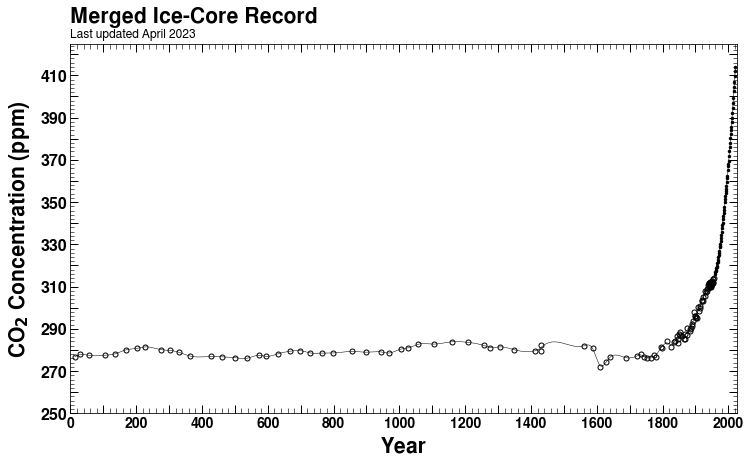

In [28]:
fig = plt.figure()

ax = fig.add_subplot()


# -------------
# Plot the data
# -------------

ax.plot(date_merged_spline, co2_merged_spline, '-', color='black', linewidth=0.5)

ax.plot(date_mlo_spo, co2_mlo_spo, 'o', color='black',
         markersize=3.5, linewidth=1,
         markerfacecolor='black', markeredgecolor='black', markeredgewidth=0)

ax.plot(date_icecore, co2_icecore, 'o', color='black',
         markersize=5, linewidth=1,
         markeredgecolor='black', markeredgewidth=1, markerfacecolor='none')

# -------------------
# Set plot properties
# -------------------
set_website_plot_props(ax, fig, xmin, xmax, ymin, ymax, xlabel, ylabel)

# ---------------
# Add plot titles
# ---------------
add_plot_title(ax, title1, title2)


# --------------------
# Add SIO logo to plot
# --------------------
xpos = 0.73
ypos = 0.18

#add_sio_logo(fig, logo_file, xpos, ypos)


# ---------------------
# Save plot for website
# ---------------------
fig = plt.gcf()

save_plot_for_website(fig)


plt.show()